In [5]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

In [4]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels
 
    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels
 
    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
     
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
     
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [6]:
# Loading the dataset
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat'picture.'


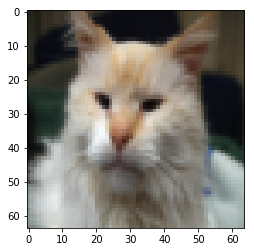

In [10]:
# Example of a picture
index = 27
plt.imshow(train_set_x_orig[index])
print('y = ' + str(train_set_y[:, index]) + ', it\'s a \'' + classes[np.squeeze(train_set_y[:, index])].decode('utf-8') + "'picture.'")

In [18]:
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]

print('Number of training examples: m_train = ' + str(m_train))
print('Number of testing examples: m_test = ' + str(m_test))
print('Height/Width of each image: num_px = ' + str(num_px))
print('Each image is of size: (' + str(num_px) + ', ' + str(num_px) + ', 3)')
print('train_set_x shape: ' + str(train_set_x_orig.shape))
print('train_set_y shape: ' + str(train_set_y.shape))
print('test_set_x shape: ' + str(test_set_x_orig.shape))
print('test_set_y shape: ' + str(test_set_y.shape))


Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [23]:
# reshape the training and test examples

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print('train_set_x_flatten shape: ' + str(train_set_x_flatten.shape))
print('train_set_y shape: ' + str(train_set_y.shape))
print('test_set_x_flatten shape: ' + str(test_set_x_flatten.shape))
print('test_set_y shape: ' + str(test_set_y.shape))


train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


In [21]:
# standardize the dataset
train_set_x = train_set_x_flatten / 255
test_set_x = train_set_x_flatten / 255

In [24]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z
    
    Arguments:
    x -- A scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    
    """
    s = 1 / (1 + np.exp(-z))
    return s

In [25]:
print('sigmoid(0) = ' + str(sigmoid(0)))
print('sigmoid(9.2) = ' + str(sigmoid(9.2)))

sigmoid(0) = 0.5
sigmoid(9.2) = 0.9998989708060922


In [26]:
# parameter initialization 

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape(dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.zeros(shape=(dim, 1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [27]:
dim = 2
w, b = initialize_with_zeros(dim)
print('w = ' + str(w))
print('b = ' + str(b))

w = [[0.]
 [0.]]
b = 0


In [32]:
# forward propagation

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w -- weights, a numpy array of size(num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true 'label' vector (containing 0 if non-cat, 1 if cat) if size (1, number of examples)
    
    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b     
    """
    
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (1 - np.log(A)))
    
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {
        'dw': dw,
        'db': db
    }
    
    return grads, cost

In [33]:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1, 2], [3, 4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print('dw = ' + str(grads['dw']))
print('db = ' + str(grads['db']))
print('cost = ' + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = -0.49994137100187724


In [36]:
# optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizer w and b by running a gradient descent algorithms
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true 'label' vector (containing 0 if non-cat, 1 if cat), if shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Return:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
    
    costs = []
    
    for i in range(num_iterations):
        # cost and gradient calculation 
        grads, cost = propagate(w, b, X, Y)
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # record the cost
        if i % 100 == 0:
            costs.append(cost)
            
        # print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print('Cost after iteration %i: %f' % (i, cost))
        
        params = {
            'w': w,
            'b': b
        }
        grads = {
            'dw': dw,
            'db': db
        }
        
        return params, grads, costs

In [38]:
params, grads, costs = optimize(w, b, X, Y, num_iterations = 100, learning_rate = 0.009, print_cost = False)

print('w = ' + str(params['w']))
print('b = ' + str(params['b']))
print('dw = ' + str(grads['dw']))
print('db = ' + str(grads['db']))

w = [[0.99100061]
 [1.98200178]]
b = 1.9955005829243777
dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574


In [39]:
# predict

def predict(w, b, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression parameter (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    """
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
        
    assert(Y_prediction.shape == (1, m))

    return Y_prediction

In [40]:
print('predictions = ' + str(predict(w, b, X)))

predictions = [[1. 1.]]
